In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from playstore.config import CLEAN_DATA_DIR

In [8]:
# Load Data
df = pd.read_csv(os.path.join(CLEAN_DATA_DIR,'googleplaystore_cleaned_category.csv')) 

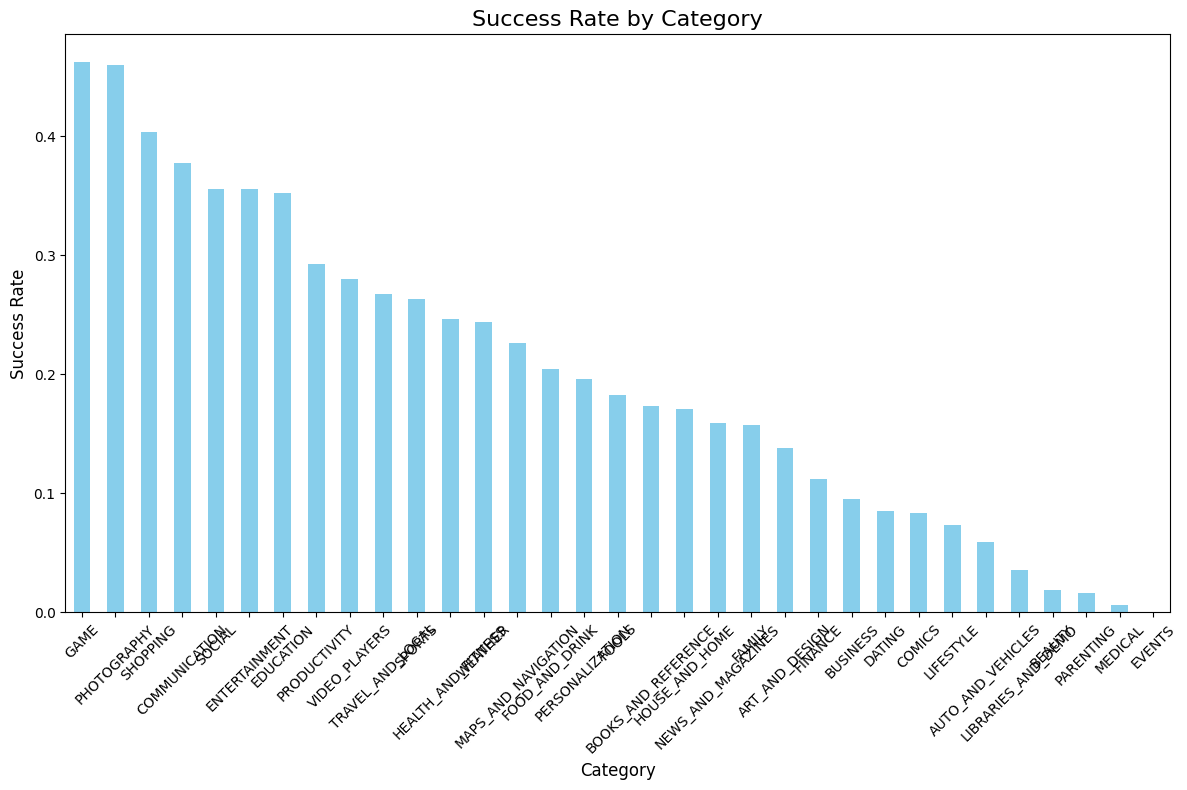

In [10]:
def clean_app_data(data):
    # Convert 'Installs' to numeric, removing any non-numeric characters
    data['Installs'] = pd.to_numeric(data['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce')
    
    # Convert 'Rating' to numeric
    data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
    
    # Fill missing or invalid values in 'Rating' with the average rating
    data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
    
    return data

# Clean the dataset
df = clean_app_data(df)

def most_successful_categories(data):
    # Define success
    data['Success'] = ((data['Installs'] > 1_000_000) & (data['Rating'] > 4.0)).astype(int)
    
    # Calculate success rate by category
    category_success = data.groupby('Category')['Success'].mean().sort_values(ascending=False)
    
    # Plot the success rate
    plt.figure(figsize=(12, 8))
    category_success.plot(kind='bar', color='skyblue')
    plt.title('Success Rate by Category', fontsize=16)
    plt.ylabel('Success Rate', fontsize=12)
    plt.xlabel('Category', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

most_successful_categories(df)


Data cleaned successfully.


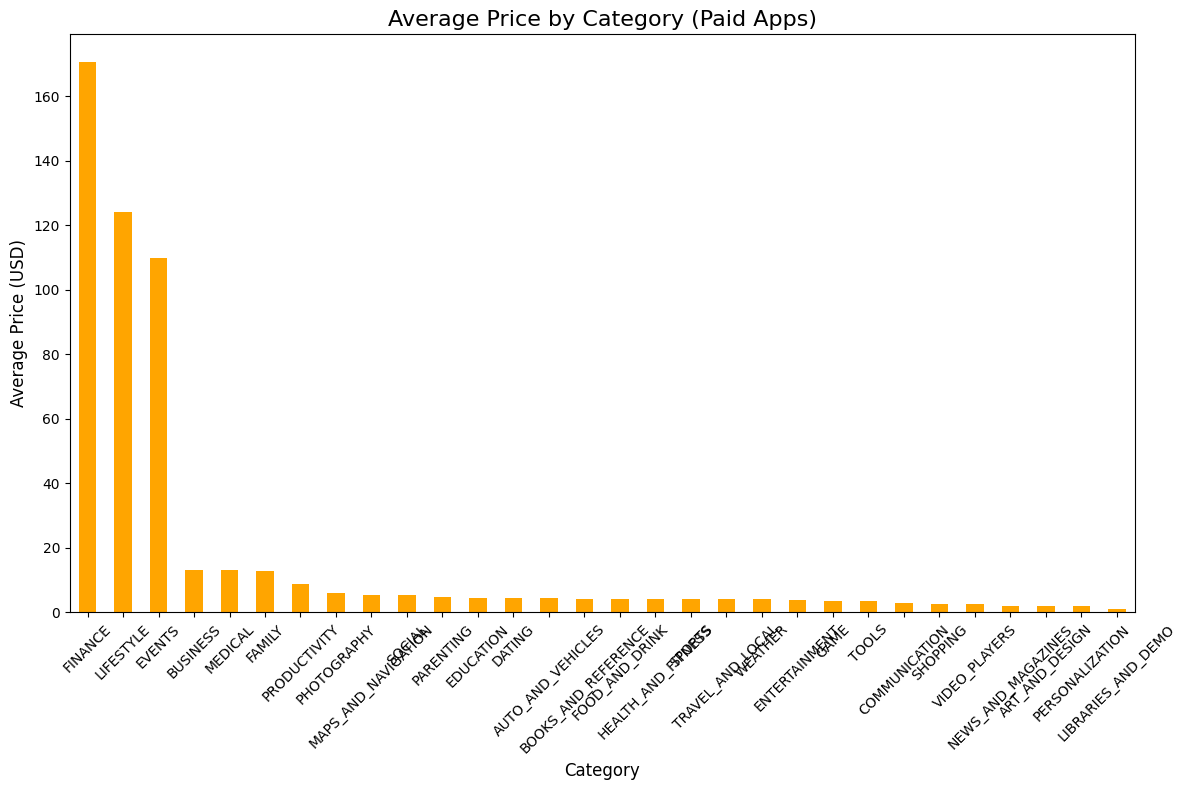

In [15]:
def clean_app_data(data):
    # Verify and clean 'Price'
    if 'Price' in data.columns:
        data['Price'] = data['Price'].astype(str).str.replace('$', '').astype(float, errors='ignore')
    
    # Verify and clean 'Installs'
    if 'Installs' in data.columns:
        data['Installs'] = data['Installs'].astype(str).str.replace(',', '').str.replace('+', '', regex=False)
        data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')
    else:
        raise ValueError("Column 'Installs' not found in data.")
    
    # Verify and clean 'Rating'
    if 'Rating' in data.columns:
        data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
        data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
    else:
        raise ValueError("Column 'Rating' not found in data.")
    
    return data

# Attempt to clean the dataset
try:
    df = clean_app_data(df)
    print("Data cleaned successfully.")
except ValueError as e:
    print(f"Error in data cleaning: {e}")

# Proceed with the analysis
def analyze_pricing_strategies(data):
    # Filter only Paid apps
    paid_apps = data[data['Type'] == 'Paid']
    
    # Ensure 'Price' is numeric
    paid_apps = paid_apps[paid_apps['Price'] > 0]
    
    # Average price by category
    avg_price = paid_apps.groupby('Category')['Price'].mean().sort_values(ascending=False)
    
    # Plot the average prices
    plt.figure(figsize=(12, 8))
    avg_price.plot(kind='bar', color='orange')
    plt.title('Average Price by Category (Paid Apps)', fontsize=16)
    plt.ylabel('Average Price (USD)', fontsize=12)
    plt.xlabel('Category', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_pricing_strategies(df)


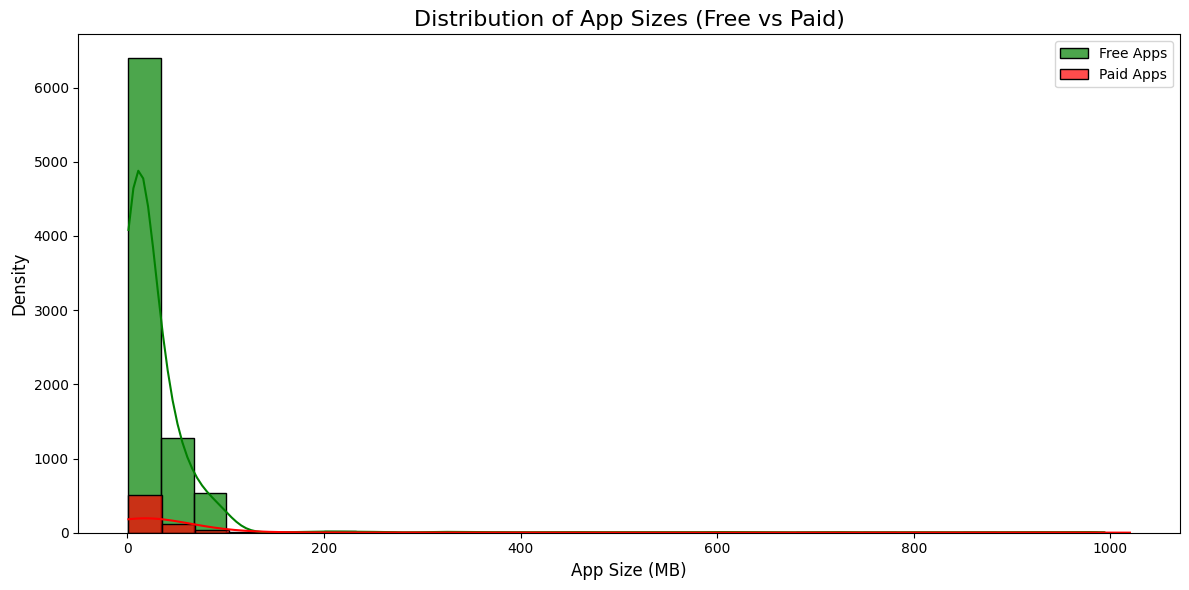

Optimal App Size (Median) - Free Apps: 15.00 MB
Optimal App Size (Median) - Paid Apps: 16.00 MB


In [17]:
def clean_app_data(data):
    # Clean the Size column
    if 'Size' in data.columns:
        data['Size'] = data['Size'].replace('Varies with device', np.nan)
        data['Size'] = data['Size'].str.replace('M', '', regex=False)
        data['Size'] = data['Size'].str.replace('k', '', regex=False)
        data['Size'] = pd.to_numeric(data['Size'], errors='coerce')  # Convert to numeric
    
    # Return cleaned data
    return data

# Clean the dataset
df = clean_app_data(df)

def analyze_optimal_size(data):
    # Separate Free and Paid apps
    free_apps = data[data['Type'] == 'Free']
    paid_apps = data[data['Type'] == 'Paid']
    
    # Plot the size distribution for Free and Paid apps
    plt.figure(figsize=(12, 6))
    sns.histplot(free_apps['Size'].dropna(), bins=30, color='green', kde=True, label='Free Apps', alpha=0.7)
    sns.histplot(paid_apps['Size'].dropna(), bins=30, color='red', kde=True, label='Paid Apps', alpha=0.7)
    plt.title('Distribution of App Sizes (Free vs Paid)', fontsize=16)
    plt.xlabel('App Size (MB)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Calculate and print optimal size ranges (median size)
    free_optimal_size = free_apps['Size'].median()
    paid_optimal_size = paid_apps['Size'].median()
    print(f"Optimal App Size (Median) - Free Apps: {free_optimal_size:.2f} MB")
    print(f"Optimal App Size (Median) - Paid Apps: {paid_optimal_size:.2f} MB")

# Run the analysis
analyze_optimal_size(df)


Free Apps:
 - Average Rating: 4.19
 - Average Number of Reviews: 478661.10

Paid Apps:
 - Average Rating: 4.25
 - Average Number of Reviews: 11673.31
 - Total Estimated Revenue: $388,629,445.79


/var/folders/kd/bldn4b0j3q31pb8c56pgmyy80000gn/T/ipykernel_56983/262000701.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/kd/bldn4b0j3q31pb8c56pgmyy80000gn/T/ipykernel_56983/262000701.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


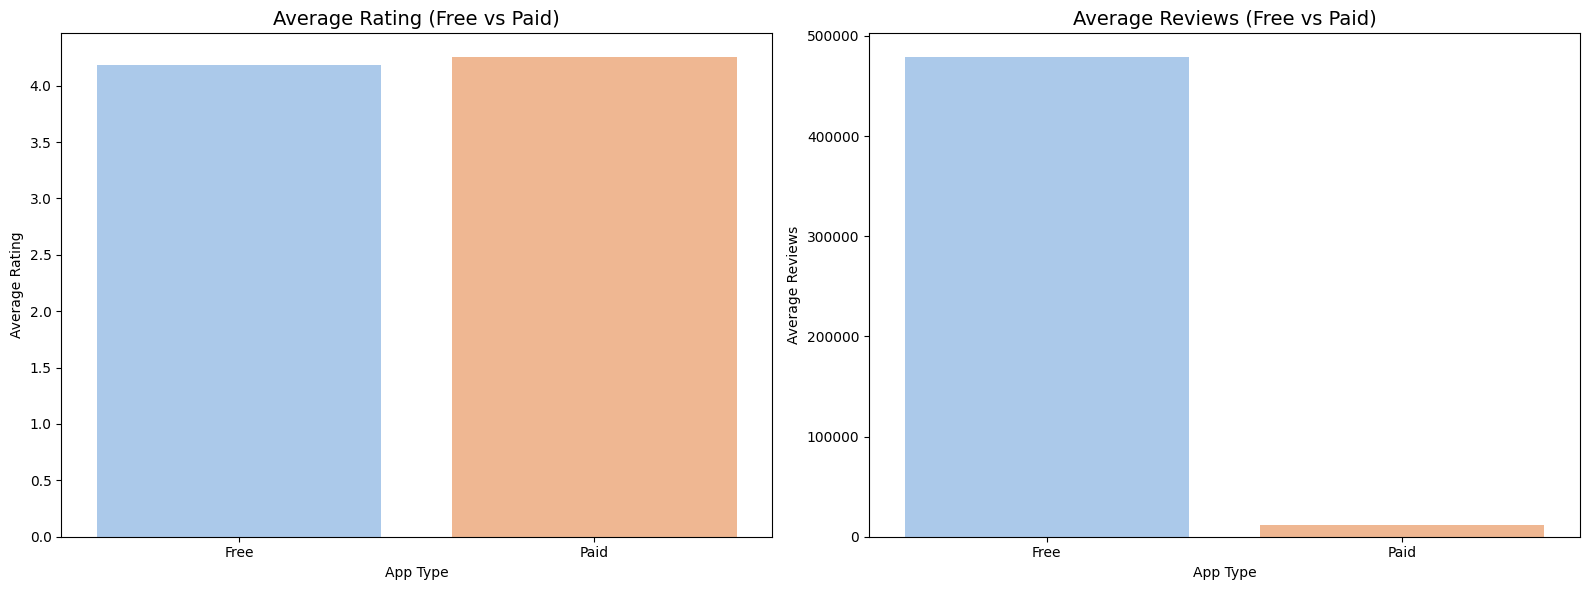

In [19]:
def compare_free_vs_paid(data):
    # Separate Free and Paid apps
    free_apps = data[data['Type'] == 'Free']
    paid_apps = data[data['Type'] == 'Paid'].copy()  # Create a copy to avoid warnings
    
    # Calculate average ratings
    avg_rating_free = free_apps['Rating'].mean()
    avg_rating_paid = paid_apps['Rating'].mean()
    
    # Calculate average number of reviews
    avg_reviews_free = free_apps['Reviews'].mean()
    avg_reviews_paid = paid_apps['Reviews'].mean()
    
    # Estimate total revenue for Paid apps
    paid_apps['EstimatedRevenue'] = paid_apps['Price'] * paid_apps['Installs']
    total_revenue = paid_apps['EstimatedRevenue'].sum()
    
    # Print insights
    print("Free Apps:")
    print(f" - Average Rating: {avg_rating_free:.2f}")
    print(f" - Average Number of Reviews: {avg_reviews_free:.2f}")
    
    print("\nPaid Apps:")
    print(f" - Average Rating: {avg_rating_paid:.2f}")
    print(f" - Average Number of Reviews: {avg_reviews_paid:.2f}")
    print(f" - Total Estimated Revenue: ${total_revenue:,.2f}")
    
    # Plot comparisons
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Ratings comparison
    sns.barplot(
        x=['Free', 'Paid'],
        y=[avg_rating_free, avg_rating_paid],
        ax=axes[0],
        palette='pastel'
    )
    axes[0].set_title('Average Rating (Free vs Paid)', fontsize=14)
    axes[0].set_ylabel('Average Rating')
    axes[0].set_xlabel('App Type')
    
    # Reviews comparison
    sns.barplot(
        x=['Free', 'Paid'],
        y=[avg_reviews_free, avg_reviews_paid],
        ax=axes[1],
        palette='pastel'
    )
    axes[1].set_title('Average Reviews (Free vs Paid)', fontsize=14)
    axes[1].set_ylabel('Average Reviews')
    axes[1].set_xlabel('App Type')
    
    plt.tight_layout()
    plt.show()

# Run the comparison
compare_free_vs_paid(df)
